##### Module import

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from lifelines.statistics import logrank_test, multivariate_logrank_test
from lifelines import KaplanMeierFitter

In [2]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

##### Data import

In [3]:
print(os.getcwd())

c:\Users\Owner\Desktop\윤태준\고용패널\고용패널 파이썬 분석\2023_04_06_변수추가\변수추가


In [4]:
df = pd.read_csv('2023_04_10_data_step.csv', encoding='cp949')

In [5]:
df_1 = df.copy()
df_1.columns

Index(['pid', 'majorcat', 'province', 'area', 'sex', 'age', 'a003', 'a010',
       'a038', 'a039',
       ...
       'big_companyG', 'work_satiG', 'company_satiG', 'supply', 'insurance',
       '주당근로일', '주당근로시간', '직장에서의복리후생제공여부', '보험가입여부', '직장만족도'],
      dtype='object', length=106)

##### Kaplan Meier Plot

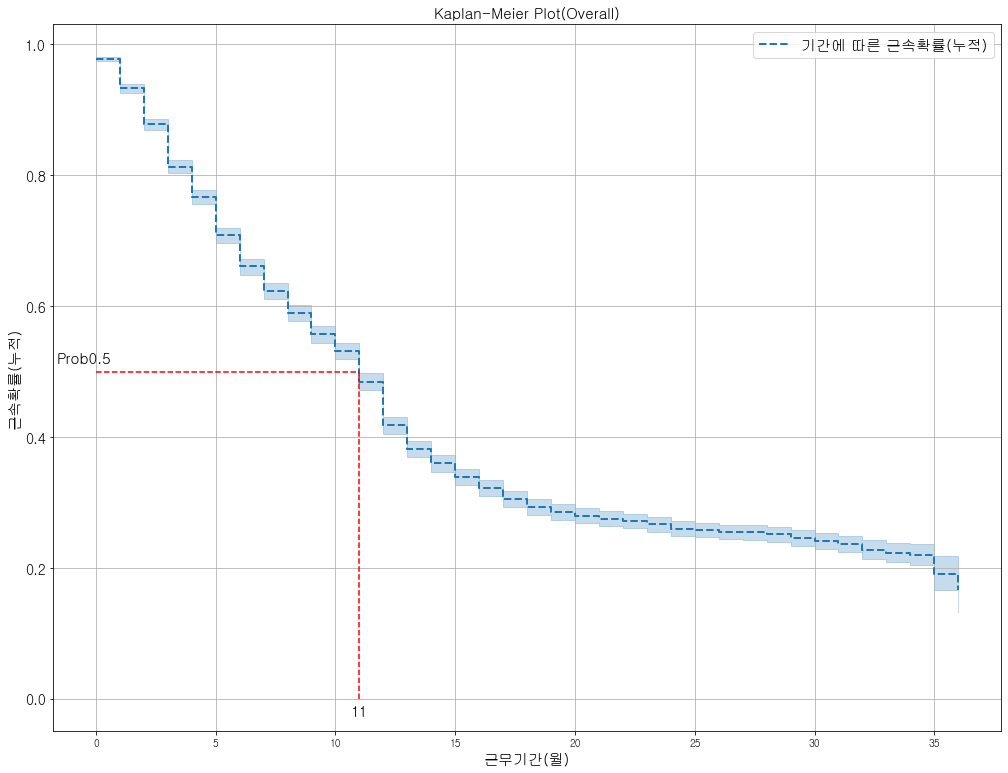

In [6]:
# Create a Kaplan-Meier plot
kmf = KaplanMeierFitter()
kmf.fit(df_1['FirstWorkPeriod'], event_observed=df_1['Resign'])

# Find the first point where the y-axis becomes 0.5
q = kmf.survival_function_.reset_index()
q = q[q['KM_estimate'] <= 0.5].iloc[0]['timeline']

plt.figure(figsize=(17,13))
kmf.plot(ci_show=True, linestyle='--', linewidth=2)
q = kmf.median_survival_time_
plt.plot([q, q], [0, 0.5], linestyle='--', color='r')
plt.plot([0, q], [0.5, 0.5], linestyle='--', color='r')
plt.text(q, -0.02, f"{q:.0f}", ha='center', va='center', fontsize=15)
plt.text(-0.5, 0.52, f"Prob{0.5}", ha='center', va='center', fontsize=15)

plt.grid(True)
plt.legend(['기간에 따른 근속확률(누적)'], fontsize=15)
plt.xlabel('근무기간(월)', fontsize=15)
# plt.xticks(range(0,1501,100))
plt.ylabel('근속확률(누적)', fontsize=15)
plt.yticks(fontsize=14)
plt.title('Kaplan-Meier Plot(Overall)', fontsize=15)

plt.show()

##### log rank test

##### 본전공 비교

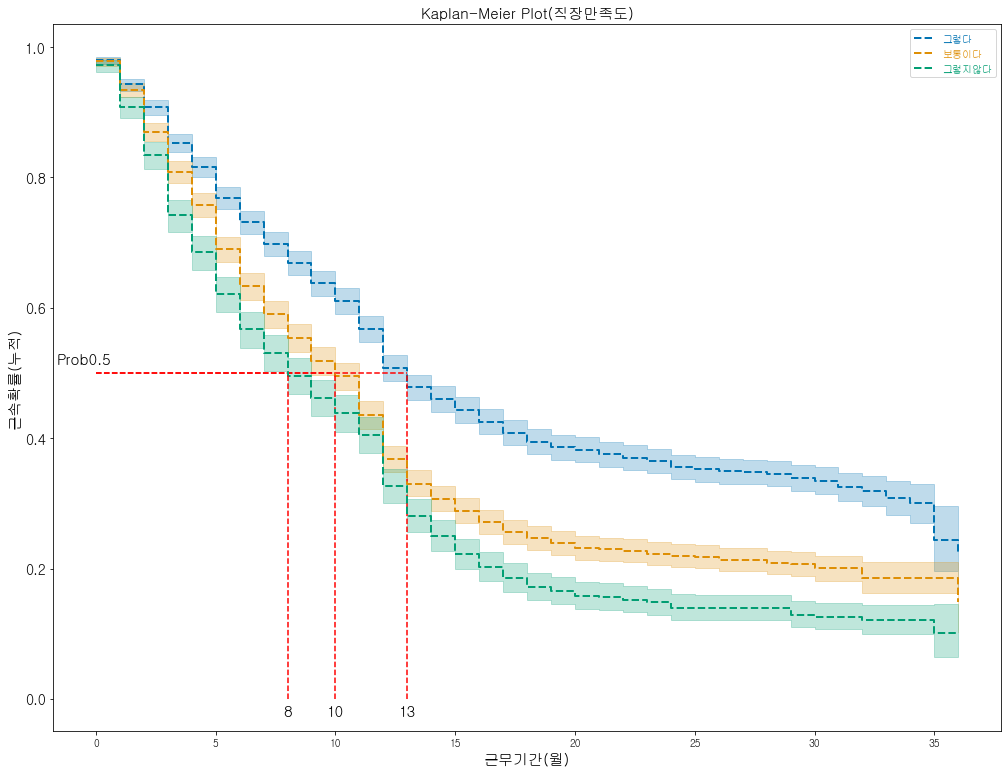

In [9]:
# define kmf3
kmf1 = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()
kmf3 = KaplanMeierFitter()

# divide data into two groups based on a condition (for example, 직장만족도)
group1 = df_1.loc[df_1['직장만족도'] == '그렇다']
group2 = df_1.loc[df_1['직장만족도'] == '보통이다']
group3 = df_1.loc[df_1['직장만족도'] == '그렇지않다']

#set seaborn palette
palette = sns.set_palette("colorblind")

plt.figure(figsize=(17,13))

# fit and plot KM curves for each group
kmf1.fit(group1['FirstWorkPeriod'], event_observed=group1['Resign'], label='그렇다')
q1 = kmf1.median_survival_time_
kmf1.plot(ci_show=True, linestyle='--', linewidth=2)
plt.plot([q1, q1], [0, 0.5], linestyle='--', color='r')
plt.plot([0, q1], [0.5, 0.5], linestyle='--', color='r')

kmf2.fit(group2['FirstWorkPeriod'], event_observed=group2['Resign'], label='보통이다')
q2 = kmf2.median_survival_time_
kmf2.plot(ci_show=True, linestyle='--', linewidth=2)
plt.plot([q2, q2], [0, 0.5], linestyle='--', color='r')
plt.plot([0, q2], [0.5, 0.5], linestyle='--', color='r')

kmf3.fit(group3['FirstWorkPeriod'], event_observed=group3['Resign'], label='그렇지않다')
q3 = kmf3.median_survival_time_
kmf3.plot(ci_show=True, linestyle='--', linewidth=2)
plt.plot([q3, q3], [0, 0.5], linestyle='--', color='r')

plt.title('Kaplan-Meier Plot(직장만족도)', fontsize=15)
plt.xlabel('근무기간(월)', fontsize= 15)
plt.ylabel('근속확률(누적)', fontsize=15)
plt.yticks(fontsize=14)

plt.text(q1, -0.02, f"{q1:.0f}", ha='center', va='center', fontsize=15)
plt.text(q2, -0.02, f"{q2:.0f}", ha='center', va='center', fontsize=15)
plt.text(q3, -0.02, f"{q3:.0f}", ha='center', va='center', fontsize=15)
plt.text(-0.5, 0.52, f"Prob{0.5}", ha='center', va='center', fontsize=15)

# set the legend using the palette
plt.legend(title='Group', fontsize=15, title_fontsize=15)
for i, text in enumerate(plt.legend().get_texts()):
    text.set_color(sns.color_palette()[i])

# # calculate log rank test statistics and add plot
# results_1 = logrank_test(group1['FirstWorkPeriod'], group2['FirstWorkPeriod'], group2['Resign'], group1['Resign'])
# plt.text(10,0.7,f"그렇다 vs 이공계_Log-Rank Test: p-value={results_1.p_value:.4f}", fontsize=15)

# results_2 = logrank_test(group1['FirstWorkPeriod'], group1['Resign'], group3['FirstWorkPeriod'], group3['Resign'])
# plt.text(10,0.5,f"그렇다 vs 예체능_Log-Rank Test: p-value={results_2.p_value:.4f}", fontsize=15)

# results_3 = logrank_test( group2['FirstWorkPeriod'], group2['Resign'], group3['FirstWorkPeriod'], group3['Resign'])
# plt.text(10,0.6,f"보통이다 vs 예체능_Log-Rank Test: p-value={results_3.p_value:.4f}", fontsize=15)

plt.show()

##### 재학중일자리경험 비교

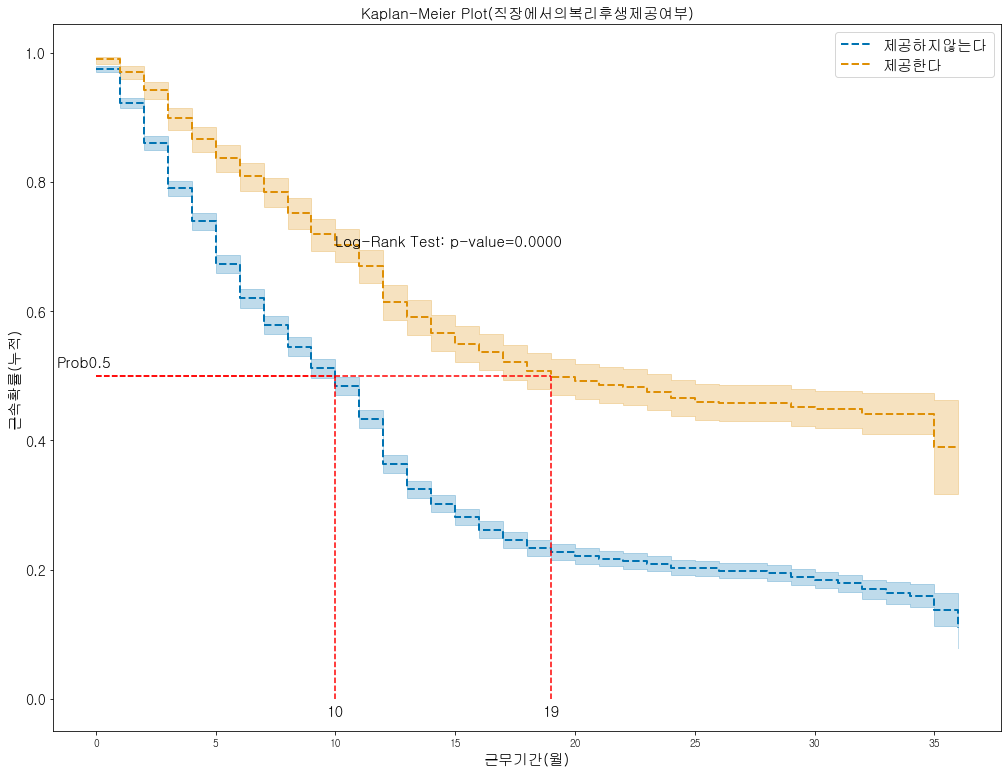

In [13]:
# divide data into two groups based on a condition (for example, 직장에서의복리후생제공여부)
group1 = df_1.loc[df_1['직장에서의복리후생제공여부'] == '제공하지않는다']
group2 = df_1.loc[df_1['직장에서의복리후생제공여부'] == '제공한다']

plt.figure(figsize=(17,13))

# fit and plot KM curves for each group
kmf1.fit(group1['FirstWorkPeriod'], event_observed=group1['Resign'], label='제공하지않는다')
q1 = kmf1.median_survival_time_
kmf1.plot(ci_show=True, linestyle='--', linewidth=2)
plt.plot([q1, q1], [0, 0.5], linestyle='--', color='r')
plt.plot([0, q1], [0.5, 0.5], linestyle='--', color='r')

kmf2.fit(group2['FirstWorkPeriod'], event_observed=group2['Resign'], label='제공한다')
q2 = kmf2.median_survival_time_
kmf2.plot(ci_show=True, linestyle='--', linewidth=2)
plt.plot([q2, q2], [0, 0.5], linestyle='--', color='r')
plt.plot([0, q2], [0.5, 0.5], linestyle='--', color='r')

plt.text(q1, -0.02, f"{q1:.0f}", ha='center', va='center', fontsize=15)
plt.text(q2, -0.02, f"{q2:.0f}", ha='center', va='center', fontsize=15)
plt.text(-0.5, 0.52, f"Prob{0.5}", ha='center', va='center', fontsize=15)

plt.title('Kaplan-Meier Plot(직장에서의복리후생제공여부)', fontsize=15)
plt.xlabel('근무기간(월)', fontsize= 15)
plt.ylabel('근속확률(누적)', fontsize=15)
plt.yticks(fontsize=14)
plt.legend(fontsize=15)

# calculate log rank test statistics and add plot
results = logrank_test(group1['FirstWorkPeriod'], group2['FirstWorkPeriod'], group1['Resign'], group2['Resign'])
plt.text(10,0.7,f"Log-Rank Test: p-value={results.p_value:.4f}", fontsize=15)

plt.show()

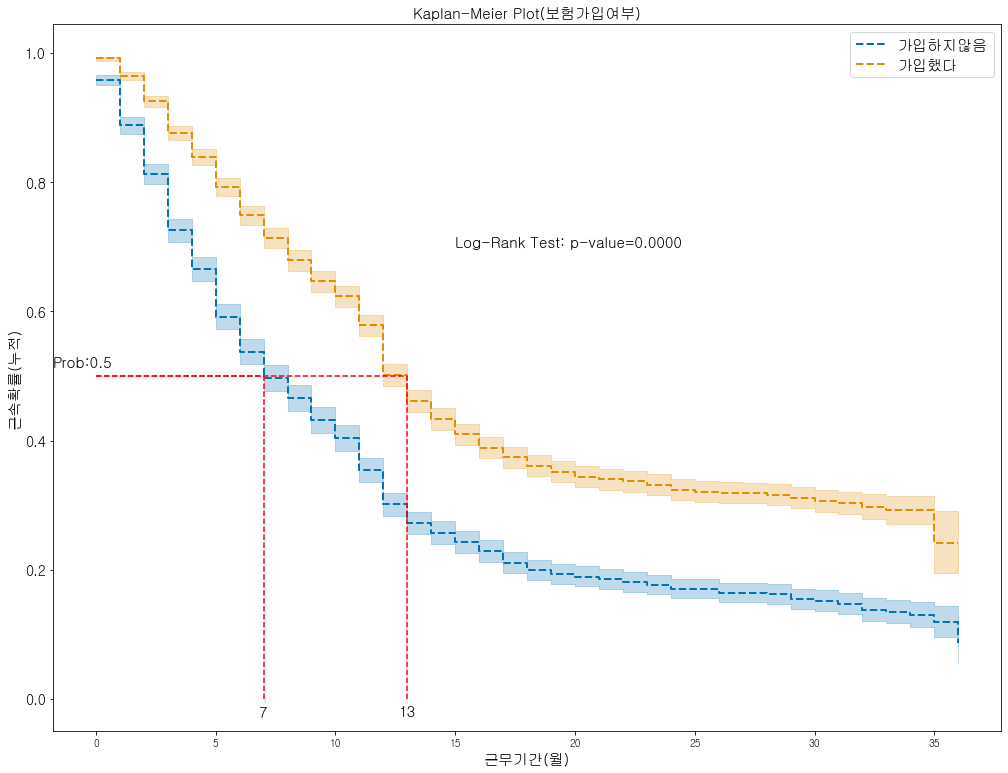

In [16]:
# divide data into two groups based on a condition (for example, 보험가입여부)
group1 = df_1.loc[df_1['보험가입여부'] == '가입하지않음']
group2 = df_1.loc[df_1['보험가입여부'] == '가입했다']

plt.figure(figsize=(17,13))

# fit and plot KM curves for each group
kmf1.fit(group1['FirstWorkPeriod'], event_observed=group1['Resign'], label='가입하지않음')
q1 = kmf1.median_survival_time_
kmf1.plot(ci_show=True, linestyle='--', linewidth=2)
plt.plot([q1, q1], [0, 0.5], linestyle='--', color='r')
plt.plot([0, q1], [0.5, 0.5], linestyle='--', color='r')

kmf2.fit(group2['FirstWorkPeriod'], event_observed=group2['Resign'], label='가입했다')
q2 = kmf2.median_survival_time_
kmf2.plot(ci_show=True, linestyle='--', linewidth=2)
plt.plot([q2, q2], [0, 0.5], linestyle='--', color='r')
plt.plot([0, q2], [0.5, 0.5], linestyle='--', color='r')

plt.text(q1, -0.02, f"{q1:.0f}", ha='center', va='center', fontsize=15)
plt.text(q2, -0.02, f"{q2:.0f}", ha='center', va='center', fontsize=15)
plt.text(0.7, 0.52, f'Prob:{0.5}', ha='right', va='center', fontsize=15)

plt.title('Kaplan-Meier Plot(보험가입여부)', fontsize=15)
plt.xlabel('근무기간(월)', fontsize= 15)
plt.ylabel('근속확률(누적)', fontsize=15)
plt.yticks(fontsize=14)
plt.legend(fontsize=15)

# calculate log rank test statistics and add plot
results = logrank_test(group1['FirstWorkPeriod'], group2['FirstWorkPeriod'], group1['Resign'], group2['Resign'])
plt.text(15,0.7,f"Log-Rank Test: p-value={results.p_value:.4f}", fontsize=15)

plt.show()